In [1]:
import os 
from pathlib import Path

# set project path
projectpath = os.path.join(Path(os.getcwd()).parent)
projectpath
os.sys.path.append(projectpath)


import pickle
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

from TopicModeling.preprocessing.preprocessing_main import preprocess_text
from TopicModeling.models.lda_model import LDATopics

%matplotlib inline
%load_ext blackcellmagic

%load_ext autoreload
%autoreload 2

In [2]:
data_name = "cbk_techremark_and_kg"
tagger = "nltk" # pattern, nltk, spacy
save_to_file_name = f"preprocessed_test_new_3_{tagger}"

try:
    
    # get data
    df = pd.read_parquet(f"../data/{data_name}")
    df_ukc_eng = df[df["KG"].isin(["UKC"])].reset_index(drop = True).dropna()
    df_ukc_eng["_techremark_length_check"] = df_ukc_eng["JOB_TECHREMARK"].apply(lambda x: False if len(x.split(" "))  < 3 else True)
    df_ukc_eng = df_ukc_eng[df_ukc_eng["_techremark_length_check"] == True]
    df_ukc_eng.reset_index(drop=True, inplace=True)

    tqdm.pandas()
    preprocessed_text = preprocess_text(df_ukc_eng.JOB_TECHREMARK, f"{save_to_file_name}.pickle", tagger = tagger)
    
    del df_ukc_eng
    
except FileExistsError:
    
    # get preprocessed if it already exists
    with open(f"../preprocessed_text/{save_to_file_name}.pickle", "rb") as f:
        preprocessed_text = pickle.load(f)

preprocessing_main.py:ERROR:preprocessed_test_new_3_nltk.pickle already exists!


In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [3]:

model = LDATopics(preprocessed_text, gram = "bigram")
scores, best_lda_model, num_topics = model.generate_topics(output_html_name = "test_c_uci", min_topics=6, max_topics=10, coherence_measure = "c_uci")

gensim.models.ldamodel:WARNING:no word id mapping provided; initializing from corpus, assuming identity
gensim.models.ldamodel:WARNING:no word id mapping provided; initializing from corpus, assuming identity
gensim.models.ldamodel:WARNING:no word id mapping provided; initializing from corpus, assuming identity
lda_model.py:INFO:
Best model coherence: -0.08914



C:\Users\matoshiv\Anaconda3\envs\dev\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
lda_model.py:INFO:pyLDAvis saved!



In [16]:
name_trained = "trained_model_test"
with open(f"../trained_models/{name_trained}.pickle", "wb") as f:
    pickle.dump(model.__dict__, f)

In [13]:
with open(f"../trained_models/{name_trained}.pickle", "rb") as f:
    model_test = pickle.load(f)

### Topic Coherence

Topic Coherence measures score of a single topic by measuring the degree of semantic similarity between high scoring words in the topic. 


$$Coherence = \sum_{i<j}score(w_{i},w_{j})$$

$$score_{uci}(w_{i},w_{j}) = \log\frac{p(w_{i},w_{j})}{p(w_{i}) * p(w_{j})}$$


$$p(w_i) = \frac{D_{corpus}(w_i)}{D_{corpus}}$$


$$p(w_{i}w_{j}) = \frac{D_{corpus}(w_{i}w_{j})}{D_{corpus}}$$



$D(w_i)$ as the count of documents containing the word wi, $D(w_i,w_j)$ the count of documents containing both words $w_i$ and $w_j$, and $D$ the total number or documents in the corpus.

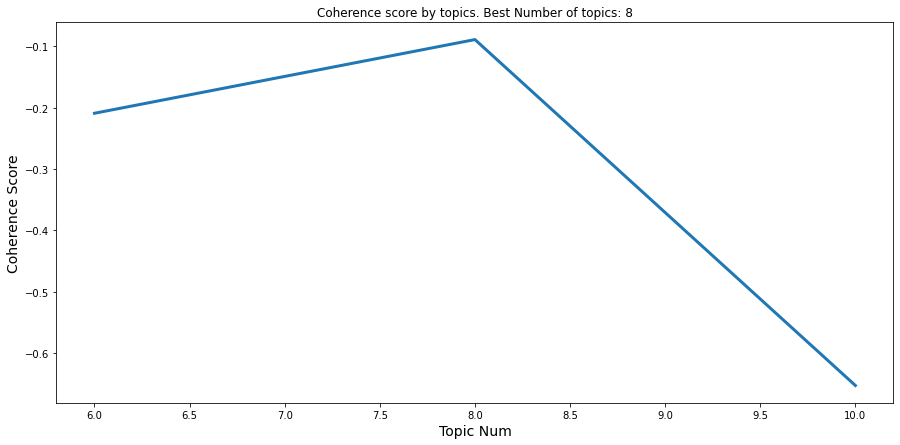

In [6]:
# get number of topics with the highest coherence scores
best_num_topics = sorted(scores, key = lambda x: x[1], reverse = True)[0][0]

fig = plt.figure(figsize = (15,7))
plt.plot(num_topics, [i[1] for i in scores], linewidth = 3)
plt.xlabel("Topic Num", fontsize = 14)
plt.ylabel("Coherence Score", fontsize = 14)
plt.title(f"Coherence score by topics. Best Number of topics: {best_num_topics}")
plt.show()


In [7]:
# words that contribute the most to the given topic
for idx, topic in best_lda_model.print_topics(-1):
    print("Words: {} \nTopics: {}".format(topic, idx))
    print("\n")

Words: 0.077*"working" + 0.072*"arrival" + 0.072*"running" + 0.061*"site" + 0.044*"reported" + 0.027*"issue" + 0.026*"access" + 0.020*"customer" + 0.020*"unable" + 0.016*"power" 
Topics: 0


Words: 0.115*"error" + 0.079*"drive" + 0.041*"suspect" + 0.038*"passenger" + 0.030*"tripped" + 0.028*"released" + 0.023*"test" + 0.021*"returned" + 0.019*"reinstated" + 0.018*"control" 
Topics: 1


Words: 0.075*"track" + 0.053*"removed" + 0.030*"jammed" + 0.029*"edge" + 0.029*"safety_edge" + 0.029*"shoe" + 0.026*"loose" + 0.026*"cleaned" + 0.023*"cleared" + 0.021*"causing" 
Topics: 2


Words: 0.127*"replaced" + 0.085*"light" + 0.037*"fitted" + 0.037*"required" + 0.023*"return" + 0.023*"supply" + 0.020*"visit" + 0.020*"lighting" + 0.018*"repaired" + 0.016*"site" 
Topics: 3


Words: 0.081*"test" + 0.063*"error" + 0.046*"switch" + 0.039*"shaft" + 0.032*"stuck" + 0.032*"level" + 0.024*"check" + 0.022*"open" + 0.022*"trap" + 0.020*"carried" 
Topics: 4


Words: 0.134*"lock" + 0.126*"adjusted" + 0.121*"la

## show dataframe results

In [8]:
pd.options.display.max_colwidth = 200


In [9]:
df_topic = model.create_results_dataframe(best_lda_model)

lda_model.py:INFO:created Dataframe!


## Number of documents per topic

<AxesSubplot:xlabel='top_topic'>

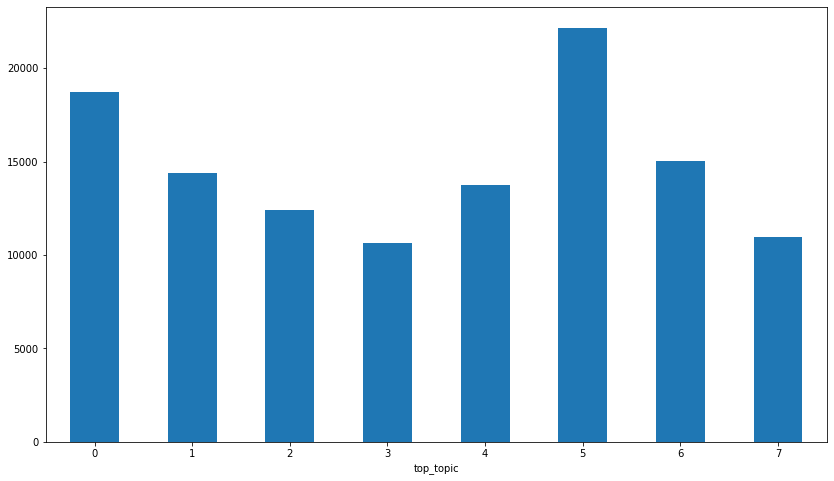

In [10]:
df_topic.groupby("top_topic").size().plot(kind = "bar", figsize = (14,8), rot = 0)


### The most representative sentence for each topic

In [20]:
df_topic.sort_values(by = ["top_topic", "topic_perc_contribution"], ascending = False).groupby("top_topic").head(1)

top_topic  topic_perc_contribution  \
3503           7                 0.932671   
64799          6                 0.920443   
45949          5                 0.951344   
50553          4                 0.932672   
12430          3                 0.926997   
560            2                 0.937408   
11493          1                 0.951341   
69255          0                 0.937468   

                                                                                   topic_keywords  \
3503            [alarm, belt, check, system, connection, brake, phone_line, client, locked, line]   
64799         [required, unit, stop, faulty, repair, order, battery, traced, replacement, button]   
45949      [lock, adjusted, landing, ground, contact, skate, button, adjustment, push, occurring]   
50553                      [test, error, switch, shaft, stuck, level, check, open, trap, carried]   
12430        [replaced, light, fitted, required, return, supply, visit, lighting, repaired, site]   
560           [track, removed, jammed, edge, safety_edge, shoe, loose, cleaned, cleared, causing]   
11493  [error, drive, suspect, passenger, tripped, released, test, returned, reinstated, control]   
69255         [working, arrival, running, site, reported, issue, access, customer, unable, power]   

                                                                                                                                                                                                          text  
3503                                            [autodialler, phoning, ongoing, issue, line, need, tested, autodialler, reprogrammed, left, service, autodialler, phoning, ongoing, issue, line, need, tested]  
64799                                                                                                       [floor, push, work, replacement, spare, required, floor, push, work, replacement, spare, required]  
45949            [checked, door, skate, checked, landing, lock, contact, found, closing, correctly, lock, beak, sticking, lock, plate, adjustment, cleaned, contact, checked, operation, left, working, order]  
50553  [lift, stuck, floor, door, opening, error, showing, door, error, reinstate, lift, service, tested, checked, monitor, lift, awhile, left, service, lift, stuck, floor, door, opening, error, showing,...  
12430                                                                   [light, lift, removed, ceiling, checked, fitting, worn, required, lighting, inside, lift, adequate, leave, service, fitting, required]  
560                                                      [debris, track, scrapping, door, roller, removed, debris, cleaned, track, door, opening, closing, longer, scrapping, returned, lift, normal, service]  
11493  [lift, stuck, floor, passenger, trapped, found, drive, unit, tripped, undervoltage, released, passenger, drive, kept_tripping, lift, stuck, floor, passenger, trapped, released, passenger, found, d...  
69255                                                               [lift, running, arrival, site, unaware, issue, lift, carried, service, visit, lift, running, arrival, site, unaware, issue, lift, carried]

### Frequency Distribution of Word Counts in Documents

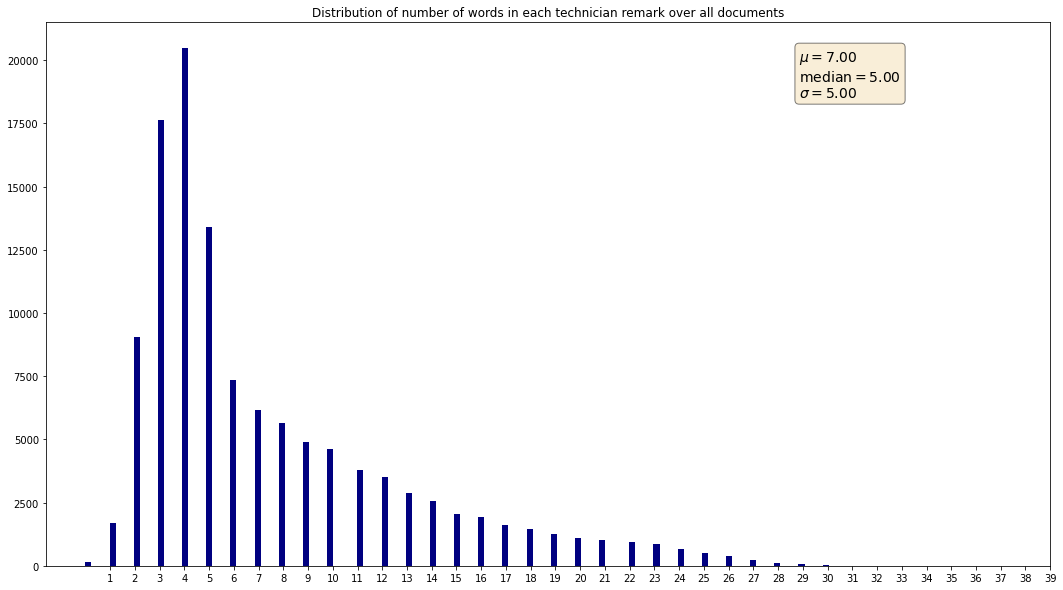

In [21]:
doc_lens = [len(d) for d in df_topic.text]

fig, ax = plt.subplots(figsize=(18,10))


ax.hist(doc_lens, bins = 'auto', color='navy', density = False)
mu = round(np.mean(doc_lens))
median = round(np.median(doc_lens))
std = round(np.std(doc_lens))

textstr = '\n'.join((
    r'$\mu=%.2f$' % (mu, ),
    r'$\mathrm{median}=%.2f$' % (median, ),
    r'$\sigma=%.2f$' % (std, )))


props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xticks(range(1,40,1))

ax.set_title("Distribution of number of words in each technician remark over all documents")

plt.show()

In [22]:
import matplotlib.colors as mcolors
colors = [color for name, color in mcolors.XKCD_COLORS.items()] 



C:\Users\matoshiv\Anaconda3\envs\dev\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\matoshiv\Anaconda3\envs\dev\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


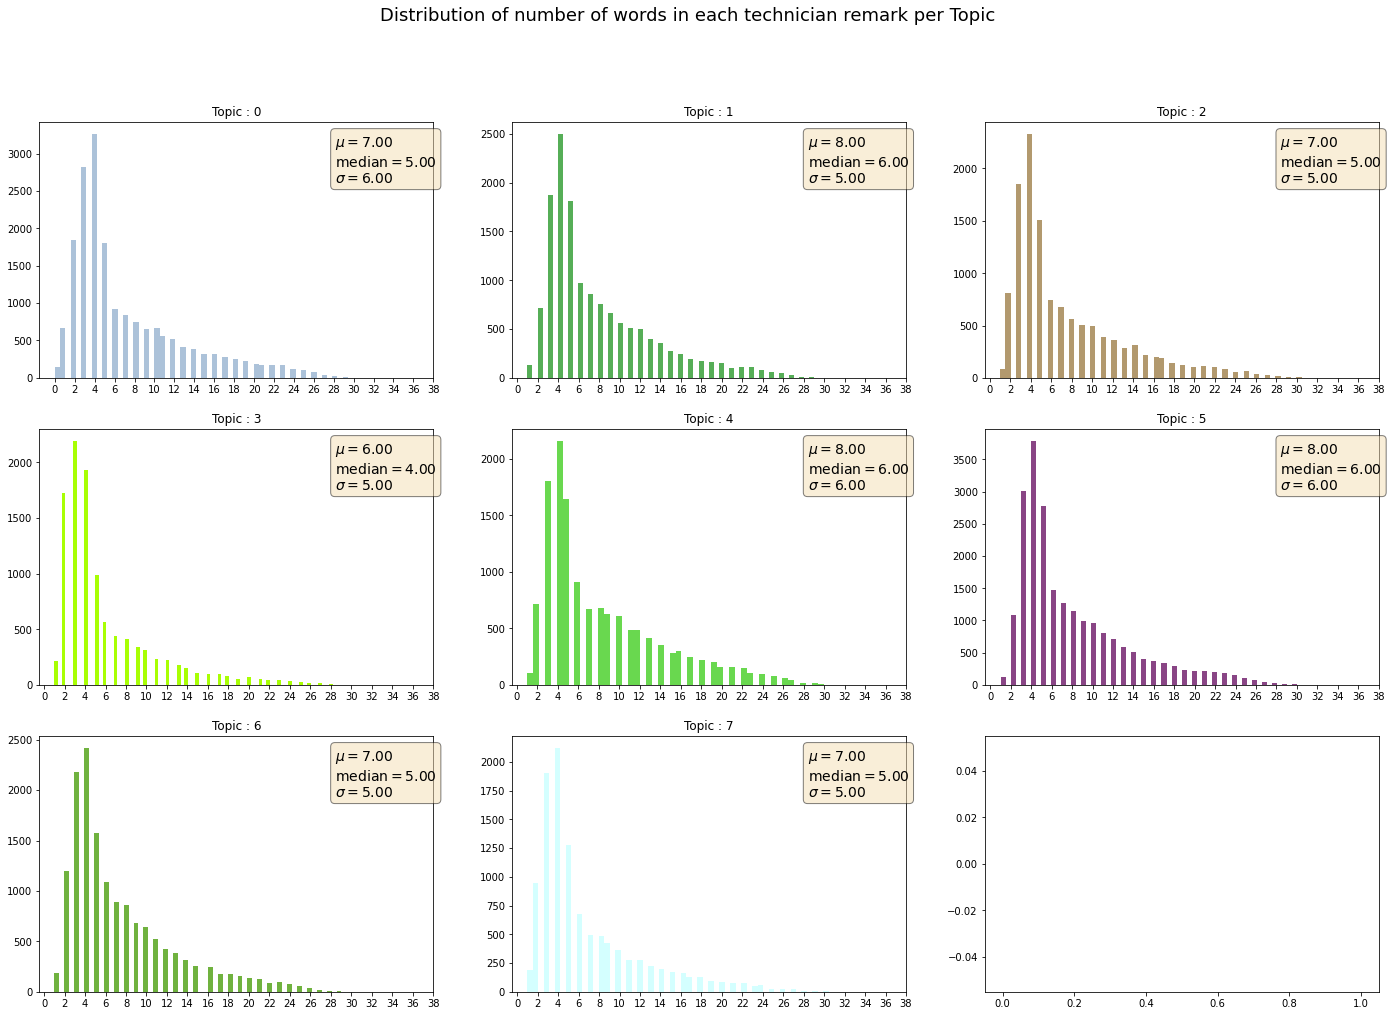

In [23]:
fig, axes = plt.subplots(int(np.ceil(best_num_topics/3)),3, sharex = False, figsize = (24,16))

for i, ax in enumerate(axes.flatten()):    
    
    try:
        _df = df_topic[df_topic["top_topic"] == i]

        doc_lens = [len(d) for d in _df.text]

        ax.hist(doc_lens, bins = 'auto', color=colors[i], density = False)
        mu = round(np.mean(doc_lens))
        median = round(np.median(doc_lens))
        std = round(np.std(doc_lens))

        textstr = '\n'.join((
            r'$\mu=%.2f$' % (mu, ),
            r'$\mathrm{median}=%.2f$' % (median, ),
            r'$\sigma=%.2f$' % (std, )))


        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

        # place a text box in upper left in axes coords
        ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=14,
                verticalalignment='top', bbox=props)
        ax.set_xticks(range(0,40,2))

        ax.set_title(f"Topic : {i}")
    except (IndexError, ValueError):
        break
        
fig.suptitle('Distribution of number of words in each technician remark per Topic', fontsize=18)
plt.show()

## Wordclouds of Topic Keywords

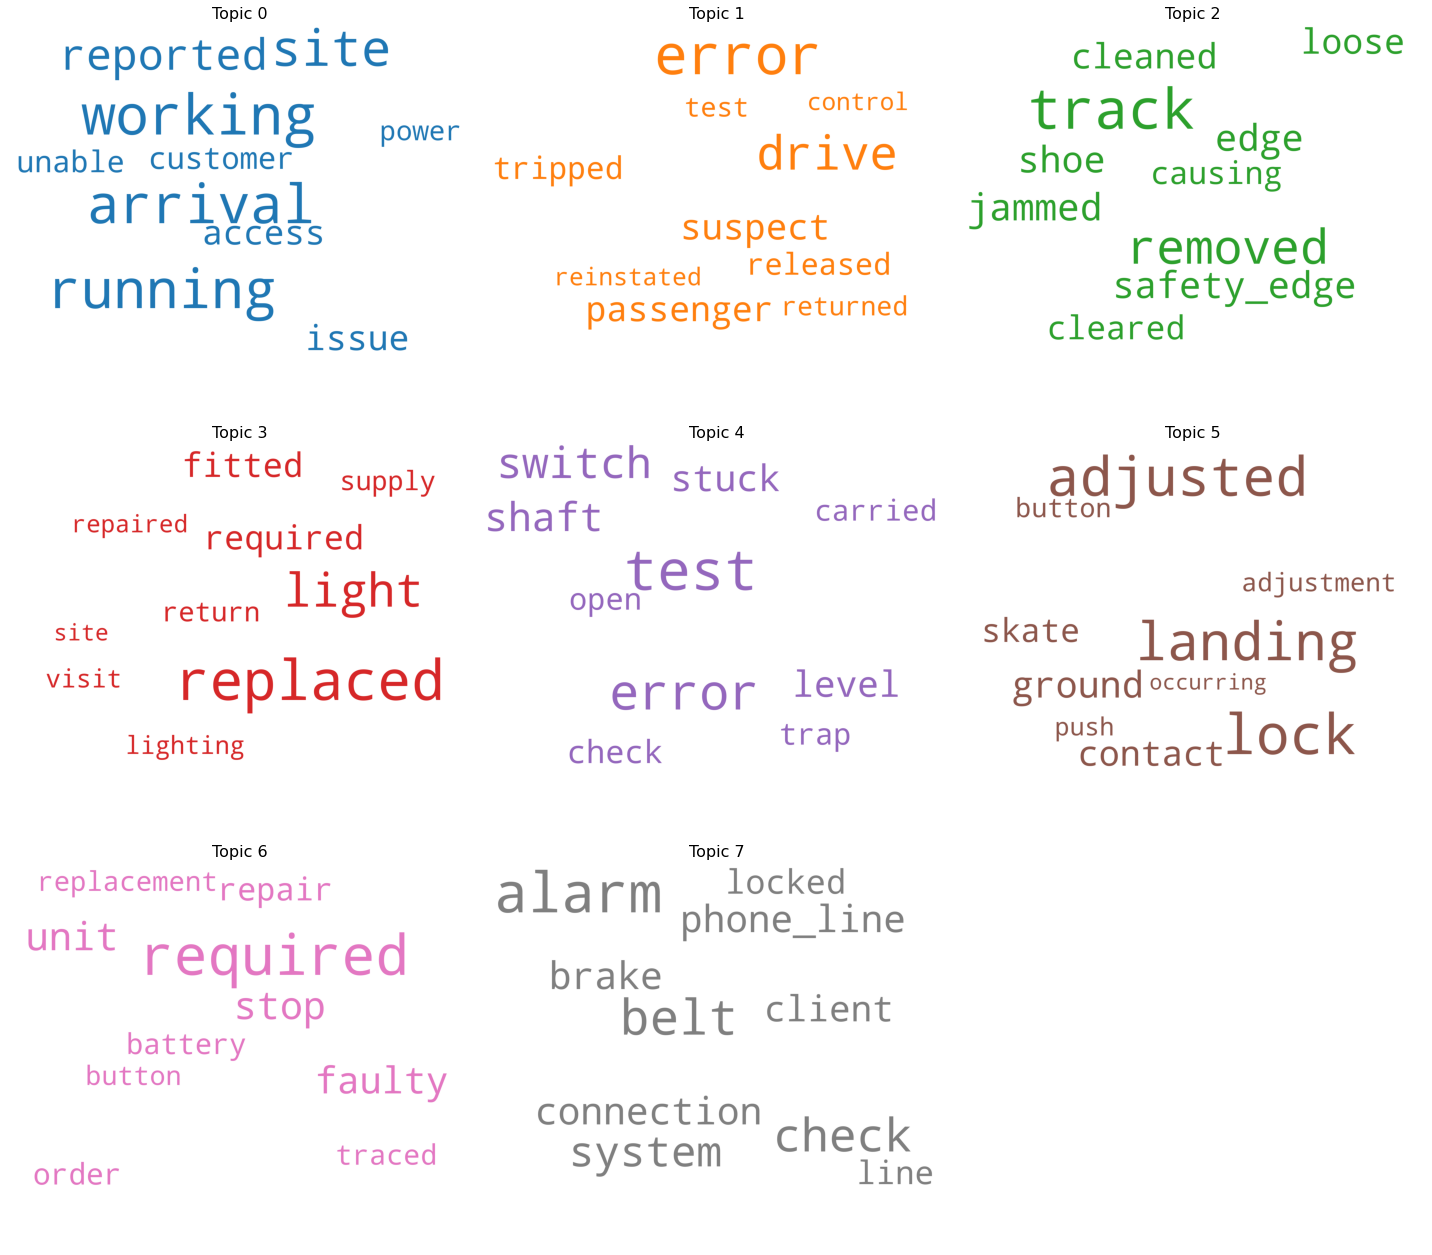

In [24]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

colors = [color for name, color in mcolors.TABLEAU_COLORS.items()] * 3

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: colors[i],
                  prefer_horizontal=1.0)

topics = best_lda_model.show_topics(num_topics = best_num_topics, formatted=False)

fig, axes = plt.subplots(int(np.ceil(best_num_topics/3)),3, figsize=(20,18), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    
    try:
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')
    
    except (IndexError, ValueError):
        
        plt.subplots_adjust(wspace=0, hspace=0)
        plt.axis('off')
        plt.margins(x=0, y=0)
        plt.tight_layout()
        
plt.show()

## Word Counts of Topic Keywords

C:\Users\matoshiv\AppData\Local\Temp/ipykernel_20312/3082232153.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right', fontsize = 14)


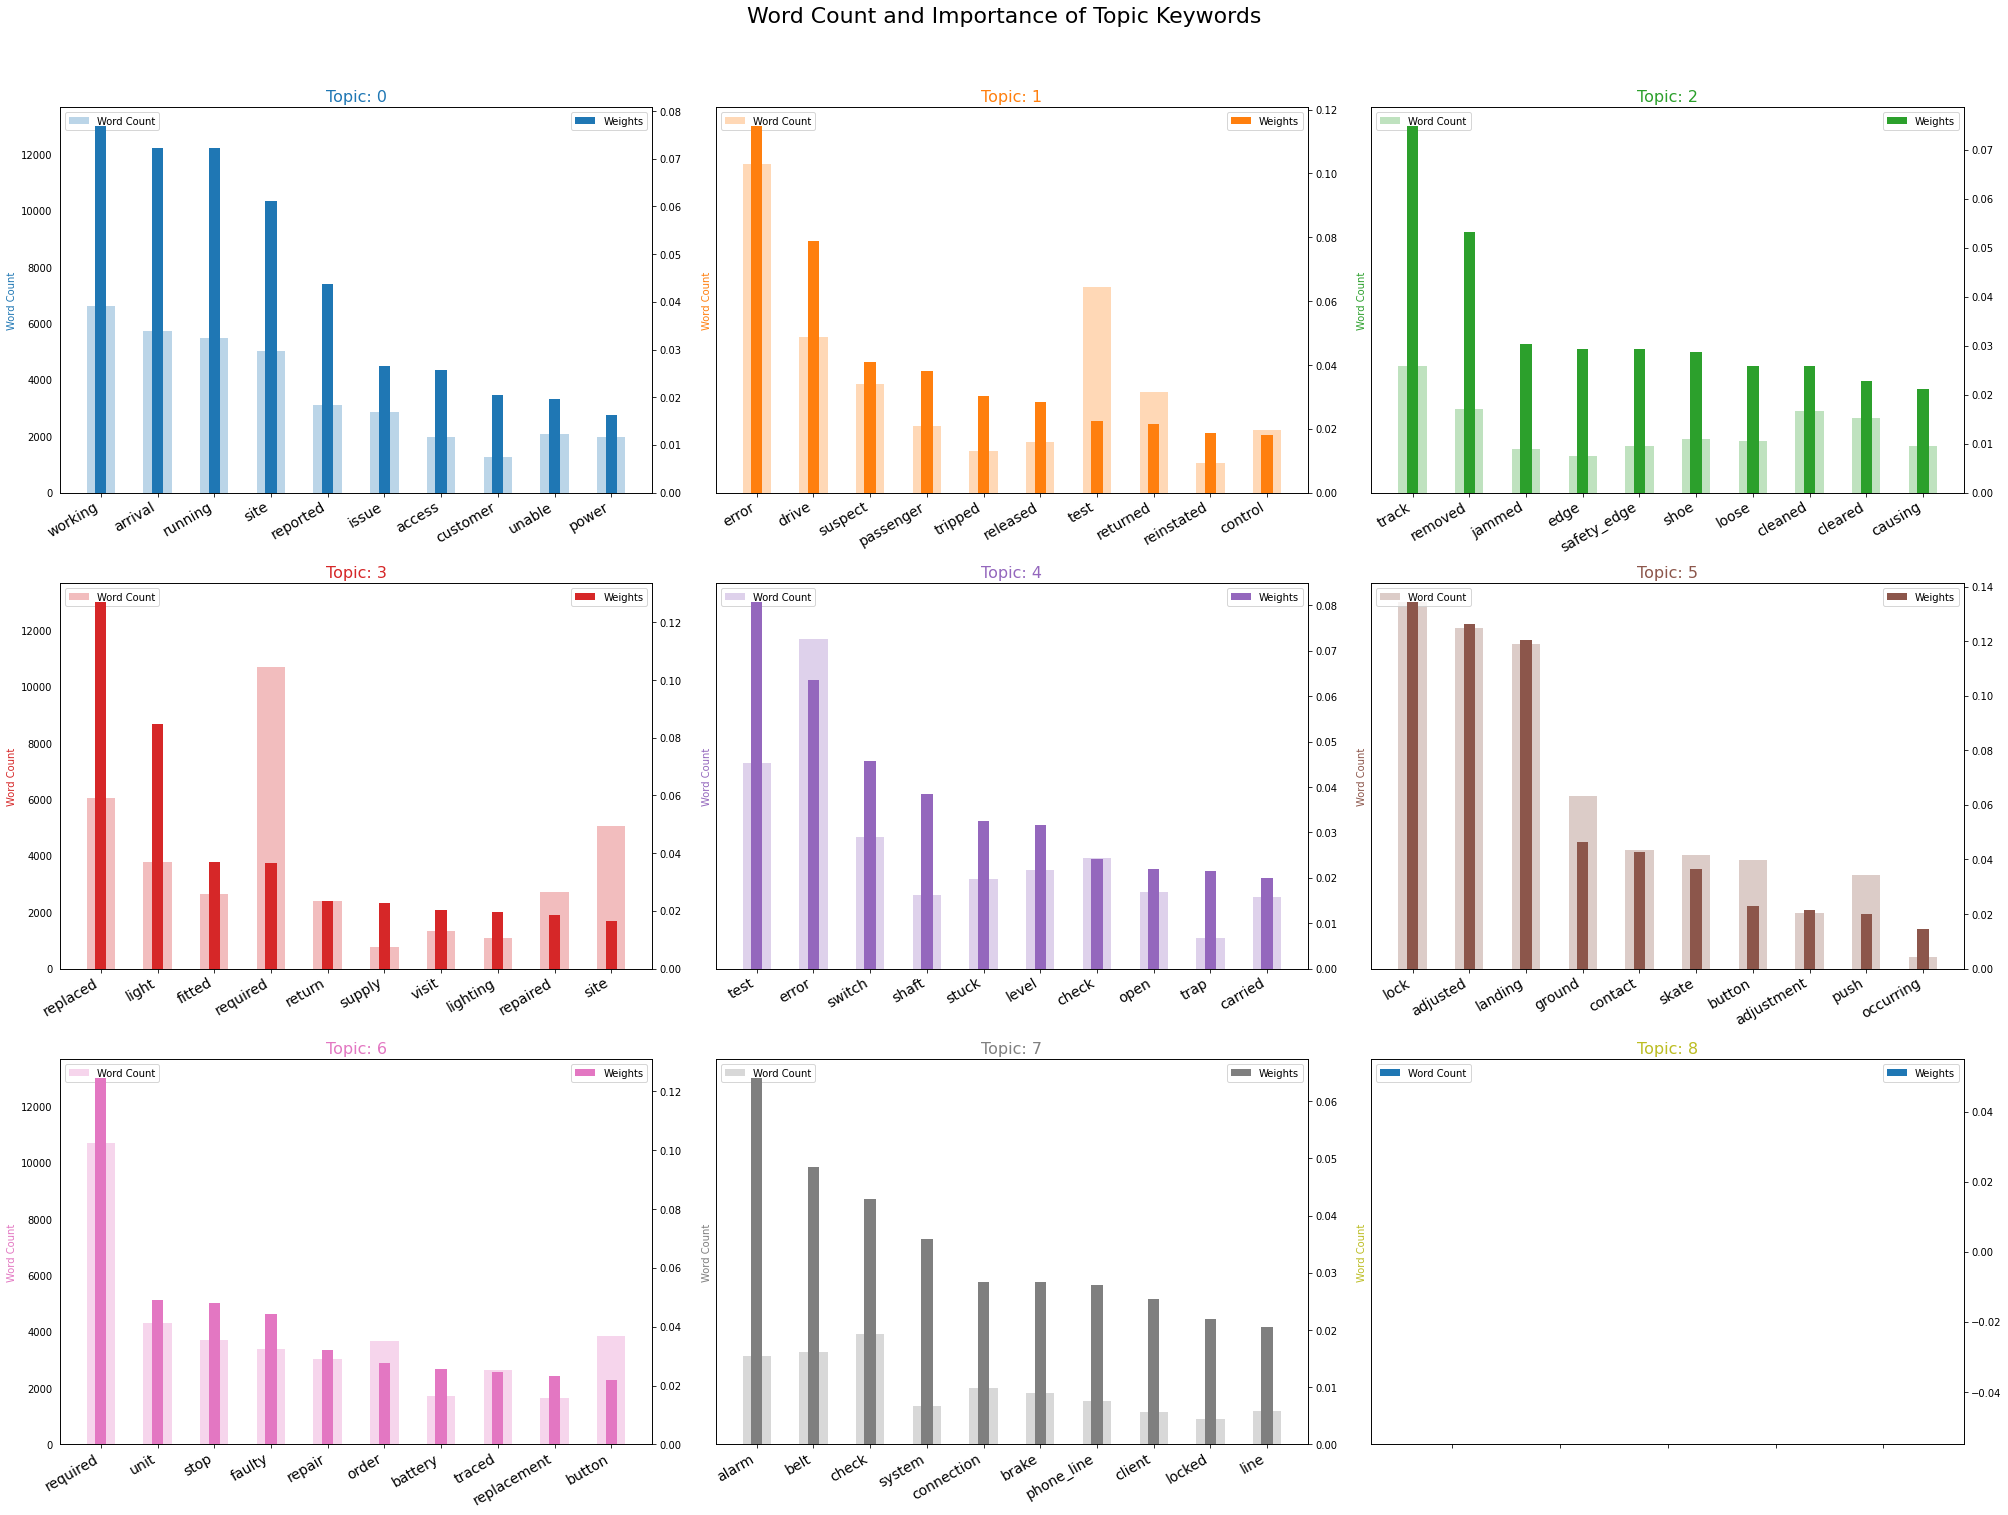

In [25]:
from collections import Counter
topics = best_lda_model.show_topics(num_topics = best_num_topics, formatted=False)
data_flat = [i for sub_list in tqdm(model.text) for i in sub_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(int(np.ceil(best_num_topics/3)),3, figsize=(28,20), sharey=True)
colors = [color for name, color in mcolors.TABLEAU_COLORS.items()] * 2

for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=colors[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=colors[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=colors[i])
    ax.set_title('Topic: ' + str(i), color=colors[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right', fontsize = 14)
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

## Clustering of the topics


In [76]:
list(map(model.dictionary.id2token.get, [i[0] for i in model.corpus[25]] ))

['lock', 'awhile', 'jammed', 'lubricant']

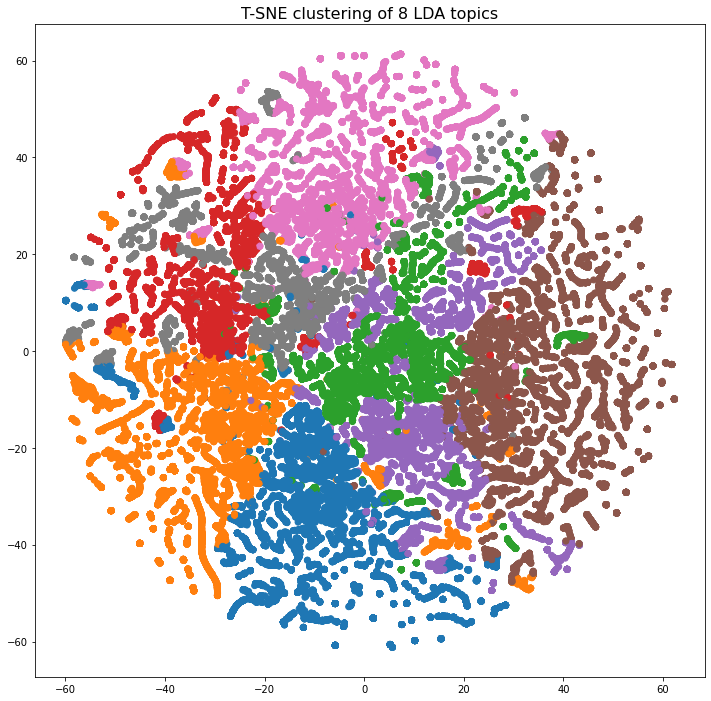

In [55]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE

# Get topic weights
topic_weights = []
for i, row_list in enumerate(best_lda_model[model.corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Ploting Topic Clusters

plt.figure(figsize = (12,12))
plt.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
plt.title(f"T-SNE clustering of {8} LDA topics", fontsize = 16)
plt.show()

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(arr)

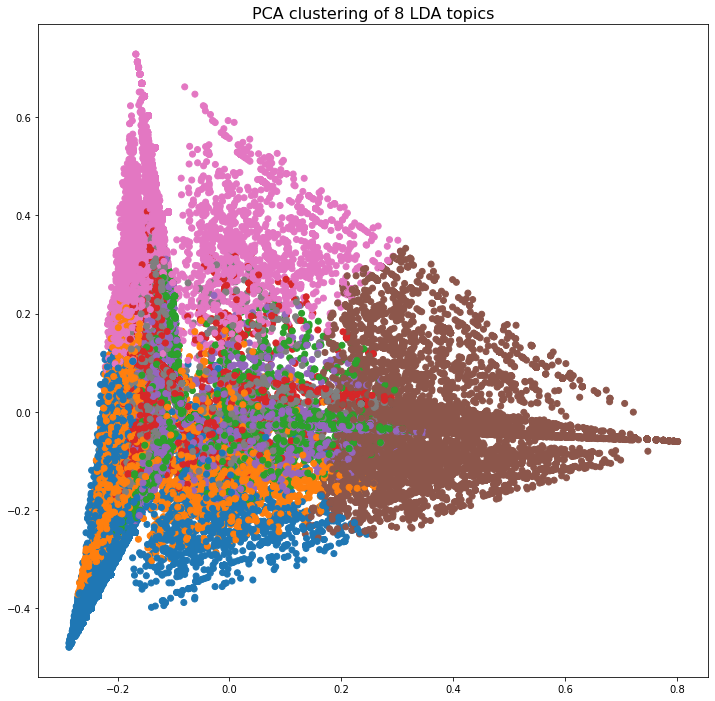

In [51]:
plt.figure(figsize = (12,12))
plt.scatter(x=X[:,0], y=X[:,1], color=mycolors[topic_num])
plt.title(f"PCA clustering of {8} LDA topics", fontsize16)
plt.show()

## Text summarization

### Gensim

In [ ]:
from gensim.summarization import summarize
import nltk
import spacy


In [ ]:
# get data
df = pd.read_parquet(f"../data/{data_name}")
df_ukc_eng = df[df["KG"].isin(["UKC"])].reset_index(drop = True).dropna()
df_ukc_eng["_techremark_length_check"] = df_ukc_eng["JOB_TECHREMARK"].apply(lambda x: False if len(x.split(" "))  < 3 else True)
df_ukc_eng = df_ukc_eng[df_ukc_eng["_techremark_length_check"] == True]
df_ukc_eng.reset_index(drop=True, inplace=True)

In [17]:
if df_ukc_eng.shape[0] != df_topic.shape[0]:
    print("different number of rows!")
    raise Exception

In [18]:
topic_techremark_full = pd.concat([df_topic, df_ukc_eng.JOB_TECHREMARK], axis = 1)[["top_topic","JOB_TECHREMARK"]]

In [108]:
nlp = spacy.load("en_core_web_sm")

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    # doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in nlp.Defaults.stop_words]
    # re-create document from filtered tokens
    doc = " ".join(filtered_tokens)
    return doc

In [109]:
text = normalize_document(text)

In [116]:
for t in range(0,best_num_topics,1):
    
    #text = " ".join(topic_techremark_full[topic_techremark_full["top_topic"] == t]["JOB_TECHREMARK"].tolist())
    text = ". ".join([i.replace(".","") for i in topic_techremark_full[topic_techremark_full.top_topic == 0]["JOB_TECHREMARK"]])

    print(f"\n***** Summary gensim, word_count = 150, topic = {t} *****\n")
    print(summarize(text, word_count=150, split=False))
    break


***** Summary gensim, word_count = 150, topic = 0 *****

Ran lift Lift found running on arrival,car interior wall panel found with hole & suspect misuse,temporary repair carried out to cover & block hole, details taken & office to be advised, lift returned to service Found at ground level doors closed Fault code 14 No door closed signal Release mechanism not functioning at ground landing Various attempts to rectify,gain access but second engineer required to assist Informed Ryan Andrews Left isolated for return vi lift not calling, inspected found to ne» Power cut in building Found 4 builders trapped in Lift A Safely removed all passengers Found all 6 lifts in building out after power cut.
Car buttons not working, left off Retention main ropes no  split pins in eyebolts Report lift  A not  calling to top floor trace fault  to B and C lift in Group as Master reset a b  c lifts tested ok Site reported lift was oos again on return found it stuck on 1st checked landing doors adjusted and 

### Transformers

In [56]:
from transformers import BartTokenizer, BartForConditionalGeneration
import torch

long_text = ". ".join([i.replace(".","") for i in topic_techremark_full[topic_techremark_full.top_topic == 0]["JOB_TECHREMARK"].sample(frac = 0.25)])
print("length of text: ", len(long_text))

model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')

# tokenize without truncation
inputs_no_trunc = tokenizer(long_text, max_length=None, return_tensors='pt', truncation=False)

# get batches of tokens corresponding to the exact model_max_length
chunk_start = 0
chunk_end = tokenizer.model_max_length  # == 1024 for Bart
inputs_batch_lst = []
while chunk_start <= len(inputs_no_trunc['input_ids'][0]):
    inputs_batch = inputs_no_trunc['input_ids'][0][chunk_start:chunk_end]  # get batch of n tokens
    inputs_batch = torch.unsqueeze(inputs_batch, 0)
    inputs_batch_lst.append(inputs_batch)
    chunk_start += tokenizer.model_max_length  # == 1024 for Bart
    chunk_end += tokenizer.model_max_length  # == 1024 for Bart

# generate a summary on each batch
summary_ids_lst = [model.generate(inputs, num_beams=4, max_length=80, early_stopping=True) for inputs in tqdm(inputs_batch_lst, desc = "summarizing")]

# decode the output and join into one string with one paragraph per summary batch
summary_batch_lst = []
for summary_id in tqdm(summary_ids_lst, desc = "decoding summary"):
    summary_batch = [tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in summary_id]
    summary_batch_lst.append(summary_batch[0])
summary_all = '\n'.join(summary_batch_lst)

print(summary_all)


355660


Token indices sequence length is longer than the specified maximum sequence length for this model (77205 > 1024). Running this sequence through the model will result in indexing errors



Woa   Power cut to site earlier in the». Lift isolated by client Complaint of erratic door operation Check as necessary Suspect faulty door control/ motor/ encoder Leave off awaiting new parts. on jbf at first floor, reset and ran. Key switch broken Lift left on goods On arrival informed lift was below floor level bottom floor Reset lift checks made Ran and tested
 faulty tested all ok Keypad on 12th floor lift b inoperative reset device tested lift left in service. Checked over no faults found. roar+tno fault found. Lift power supply failed following power cut, also brake release battery’s have ran flat with having no charge voltage over the weekend Lift isolated awaiting parts. Tenant trapped in lift for three hours, tested
 no signs of burning. reconnected lop, reconfigured & tested. Switched off all lift shaft lights. SWITCHED OFF SERVICE VISITS. Reset and checked. Report of lift doors intermittently fau». Running nff on visit LIS. Running on arrival, complete clean down req. trap

In [59]:
long_text = summary_all


model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')

# tokenize without truncation
inputs_no_trunc = tokenizer(long_text, max_length=None, return_tensors='pt', truncation=False)

# get batches of tokens corresponding to the exact model_max_length
chunk_start = 0
chunk_end = tokenizer.model_max_length  # == 1024 for Bart
inputs_batch_lst = []
while chunk_start <= len(inputs_no_trunc['input_ids'][0]):
    inputs_batch = inputs_no_trunc['input_ids'][0][chunk_start:chunk_end]  # get batch of n tokens
    inputs_batch = torch.unsqueeze(inputs_batch, 0)
    inputs_batch_lst.append(inputs_batch)
    chunk_start += tokenizer.model_max_length  # == 1024 for Bart
    chunk_end += tokenizer.model_max_length  # == 1024 for Bart

# generate a summary on each batch
summary_ids_lst = [model.generate(inputs, num_beams=4, max_length=80, early_stopping=True) for inputs in tqdm(inputs_batch_lst, desc = "summarizing")]

# decode the output and join into one string with one paragraph per summary batch
summary_batch_lst = []
for summary_id in tqdm(summary_ids_lst, desc = "decoding summary"):
    summary_batch = [tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in summary_id]
    summary_batch_lst.append(summary_batch[0])
summary_all = '\n'.join(summary_batch_lst)

print(summary_all)

Token indices sequence length is longer than the specified maximum sequence length for this model (5925 > 1024). Running this sequence through the model will result in indexing errors



Woa   Power cut to site earlier in the». Lift isolated by client Complaint of erratic door operation Check as necessary Suspect faulty door control/ motor/ encoder Leave off awaiting new parts. on jbf at first floor, reset and ran. Key switch broken Lift left on goods On arrival informed lift was below floor level bottom floor Reset lift checks made Ran and tested
 card was inserted correctly and all plugs we’re connected okay Tested lift alarm from car top this was fineAlarm ok. running on arrival ran and tested. Got key pad working. Lift overtravelled top floor customer reset checked up levelling circuit all working correctly. Provide access to lift pit for Client a». Found no fault found No fault found. Lift running on
oa tested autodialler ,working ok ,cus».Checked all drive Connections and safety circuit Further inspection required possible new drive Request site not to reset so engineer can see active fault. All lifts work on correctly and management are unaware of any call rais

In [ ]:
from transformers import AutoModelWithLMHead, AutoTokenizer

model = AutoModelWithLMHead.from_pretrained("t5-base")
tokenizer = AutoTokenizer.from_pretrained("t5-base")

# T5 uses a max_length of 512 so we cut the article to 512 tokens.
inputs = tokenizer.encode("summarize: " + "Hello world", return_tensors="pt", max_length=512)
outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
print(outputs)

C:\Users\matoshiv\Anaconda3\envs\dev\lib\site-packages\transformers\models\auto\modeling_auto.py:898: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


In [124]:
from transformers import AutoModelWithLMHead, AutoTokenizer

model = AutoModelWithLMHead.from_pretrained("t5-base")
tokenizer = AutoTokenizer.from_pretrained("t5-base")

# T5 uses a max_length of 512 so we cut the article to 512 tokens.
inputs = tokenizer.encode("summarize: " + ARTICLE, return_tensors="pt", max_length=512)
outputs = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
print(outputs)

ImportError: 
AutoModelWithLMHead requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
